In [ ]:
import pandas as pd

# Load the dataset (assuming it's downloaded from Kaggle)
df = pd.read_csv('Tweets.csv')  # Adjust the path to where your dataset is located
df.head()


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
df.info()  # Check for missing values and data types
df.describe()  # Check for basic statistics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


,category
count,162973.000000
mean,0.225436
std,0.781279
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


from matplotlib import pyplot as plt
_df_0['category'].plot(kind='hist', bins=20, title='category')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['category'].plot(kind='line', figsize=(8, 4), title='category')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Check the columns in your dataset
print(df.columns)


Index(['clean_text', 'category'], dtype='object')


In [ ]:
pip install nltk


In [ ]:
# Step 3: Data Cleaning (Text Preprocessing)
import re
import nltk

# Download necessary NLTK data
nltk.download('stopwords')
from nltk.corpus import stopwords

# Define stopwords
stop_words = set(stopwords.words('english'))

# Function to clean text data
def clean_text(text):
    if isinstance(text, str):  # Check if the input is a string
        text = re.sub(r'http\S+', '', text)  # Remove URLs
        text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
        text = text.lower()  # Convert to lowercase
        text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
        return text
    return ''  # Return empty string if the input is not a string

# Apply cleaning to the 'clean_text' column
df['clean_text'] = df['clean_text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

# Step 4: Feature Extraction (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Transform the 'clean_text' column into feature vectors
X = tfidf.fit_transform(df['clean_text'])


In [ ]:
# Step 5: Train-Test Split
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, df['category'], test_size=0.2, random_state=42)


In [ ]:
# Step 6: Model Training
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(max_iter=200)

y_train.fillna(-1, inplace=True)

# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
# Step 7: Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on the test data
y_pred = model.predict(X_test)

# Print classification report and accuracy
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.88      0.77      0.83      7179
         0.0       0.86      0.97      0.92     11034
         1.0       0.92      0.89      0.90     14383

    accuracy                           0.89     32596
   macro avg       0.89      0.88      0.88     32596
weighted avg       0.89      0.89      0.89     32596

Accuracy: 0.8919499325070561


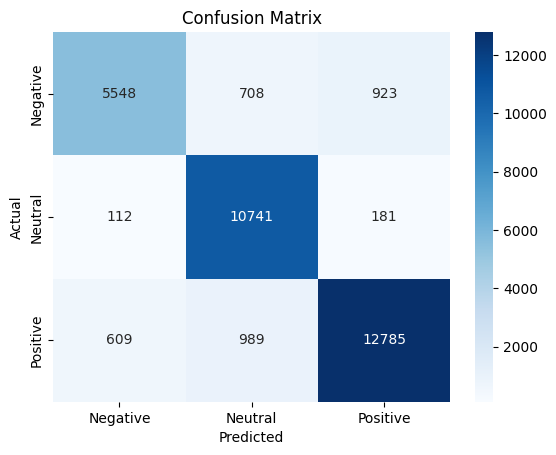

In [ ]:
# Plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

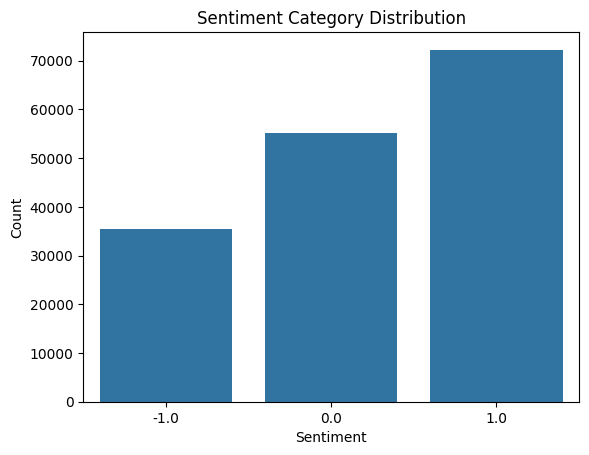

In [ ]:
# Step 8: Visualizing Sentiment Distribution
sns.countplot(x='category', data=df)
plt.title('Sentiment Category Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()